<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Time Series Analysis of California's Unemployment Rate

In [1]:
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [2]:
# bring in our 'county_ed' dataset 
df1 = pd.read_csv('data/county_ed.csv')
df1.head()

,County,High School Grad,4 Year College Degree,Highest Unemployment Rate,Highest UR was during Pandemic,2017 Census of Agriculture Rank(Crops)
0,Los Angeles,80.9,34.0,13.2,1,31
1,Alameda,89.0,49.6,11.5,1,41
2,San Bernardino,81.1,21.9,14.5,0,33
3,Riverside,83.0,23.5,14.8,1,14
4,Placer,94.8,41.6,12.4,1,40


In [3]:
# Since we are only planning on focusing on the rop 5 producing counties for the scope of this project, call on .head() to
# get those 5 counties. 
df1 = df1.sort_values('2017 Census of Agriculture Rank(Crops)', ascending = True)
df1.head()

,County,High School Grad,4 Year College Degree,Highest Unemployment Rate,Highest UR was during Pandemic,2017 Census of Agriculture Rank(Crops)
38,Fresno,77.9,22.6,19.0,0,1
32,Monterey,73.0,26.5,20.1,0,2
42,Kern,75.9,17.6,18.6,1,3
49,Tulare,72.6,15.2,24.6,0,4
46,San Joaquin,80.3,19.5,18.3,0,5


In [4]:
# Bring in the 'counties.csv' dataset from our EDA_notebook. This data will already be pruned and marked in the EDA_notebook
df = pd.read_csv('data/counties.csv')
df.head()

,month_year,Area Name,Labor Force,Employment,Unemployment,Unemployment Rate
0,1976-04,California,9692493,8835232,857261,0.088
1,1976-04,Los Angeles County,3362757,3082562,280195,0.083
2,1976-04,Los Angeles-Long Beach-Glendale MD,3362757,3082562,280195,0.083
3,1976-08,California,10115963,9196592,919371,0.091
4,1976-08,Los Angeles County,3430133,3114869,315264,0.092


In [5]:
df.set_index('month_year', inplace = True)

In [6]:
# import adfuller
from statsmodels.tsa.stattools import adfuller

# import diff() function from our work_shown notebook
def diff(county): 
    county = county.sort_index()
    county = county.drop(['Area Name', 
                          'Labor Force', 
                          'Employment', 
                          'Unemployment'],
                       axis =1)
    
    county_diff = county.diff(periods =1)
    county_diff = county_diff.dropna()

# Plot county with trends removed
    county_diff.plot(figsize = (18,6))
    plt.xlabel('Year', fontsize = 18)
    plt.ylabel('Unemployment Rate')
    plt.title("Stationary data", fontsize = 18);

    dftest = adfuller(county_diff)

# Display testing data 
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic',
                       'p-value',
                       '#Lags Used',
                       'Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    display(dfoutput)

In [7]:
# Break dataset into county areas using county name minus 
# the word, 'county' in variable name 
Los_Angeles = df.loc[df['Area Name'] == 'Los Angeles County']
Alameda = df.loc[df['Area Name'] == 'Alameda County']
San_Bernardino = df.loc[df['Area Name'] == 'San Bernardino County']
Riverside = df.loc[df['Area Name'] == 'Riverside County']
Placer = df.loc[df['Area Name'] == 'Placer County']
Siskiyou = df.loc[df['Area Name'] == 'Siskiyou County']
Madera = df.loc[df['Area Name'] == 'Madera County']
El_Dorado = df.loc[df['Area Name'] == 'El Dorado County']
Calaveras = df.loc[df['Area Name'] == 'Calaveras County']
Sutter = df.loc[df['Area Name'] == 'Sutter County']
Colusa = df.loc[df['Area Name'] == 'Colusa County']
Butte = df.loc[df['Area Name'] == 'Butte County']
Lake = df.loc[df['Area Name'] == 'Lake County']
Yuba = df.loc[df['Area Name'] == 'Yuba County']
Del_Norte = df.loc[df['Area Name'] == 'Del Norte County']
Yolo = df.loc[df['Area Name'] == 'Yolo County']
San_Diego = df.loc[df['Area Name'] == 'San Diego County']
Humboldt = df.loc[df['Area Name'] == 'Humboldt County']
Amador = df.loc[df['Area Name'] == 'Amador County']
Glenn = df.loc[df['Area Name'] == 'Glenn County']
Mono = df.loc[df['Area Name'] == 'Mono County']
Ventura = df.loc[df['Area Name'] == 'Ventura County']
Plumas = df.loc[df['Area Name'] == 'Plumas County']
Solano = df.loc[df['Area Name'] == 'Solano County']
Napa = df.loc[df['Area Name'] == 'Napa County']
San_Luis_Obispo = df.loc[df['Area Name'] == 'San Luis Obispo County']
Tuolumne = df.loc[df['Area Name'] == 'Tuolumne County']
Alpine = df.loc[df['Area Name'] == 'Alpine County']
Sierra = df.loc[df['Area Name'] == 'Sierra County']
Tehama = df.loc[df['Area Name'] == 'Tehama County']
Marin = df.loc[df['Area Name'] == 'Marin County']
Trinity = df.loc[df['Area Name'] == 'Trinity County']
Monterey = df.loc[df['Area Name'] == 'Monterey County']
Orange = df.loc[df['Area Name'] == 'Orange County']
San_Francisco = df.loc[df['Area Name'] == 'San Francisco County']
Mendocino = df.loc[df['Area Name'] == 'Mendocino County']
Santa_Cruz = df.loc[df['Area Name'] == 'Santa Cruz County']
Kings = df.loc[df['Area Name'] == 'Kings County']
Fresno = df.loc[df['Area Name'] == 'Fresno County']
Santa_Barbara = df.loc[df['Area Name'] == 'Santa Barbara County']
Shasta = df.loc[df['Area Name'] == 'Shasta County']
Sonoma = df.loc[df['Area Name'] == 'Sonoma County']
Kern = df.loc[df['Area Name'] == 'Kern County']
Modoc = df.loc[df['Area Name'] == 'Modoc County']
Sacramento = df.loc[df['Area Name'] == 'Sacramento County']
Santa_Clara = df.loc[df['Area Name'] == 'Santa Clara County']
San_Joaquin = df.loc[df['Area Name'] == 'San Joaquin County']
Nevada = df.loc[df['Area Name'] == 'Nevada County']
Mariposa = df.loc[df['Area Name'] == 'Mariposa County']
Tulare = df.loc[df['Area Name'] == 'Tulare County']
Contra_Costa = df.loc[df['Area Name'] == 'Contra Costa County']
Merced = df.loc[df['Area Name'] == 'Merced County']
San_Benito = df.loc[df['Area Name'] == 'San Benito County']
Lassen = df.loc[df['Area Name'] == 'Lassen County']
San_Mateo = df.loc[df['Area Name'] == 'San Mateo County']
Stanislaus = df.loc[df['Area Name'] == 'Stanislaus County']
Inyo = df.loc[df['Area Name'] == 'Inyo County']
Imperial = df.loc[df['Area Name'] == 'Imperial County']

Test Statistic                  -3.851484
p-value                          0.002422
#Lags Used                      16.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64

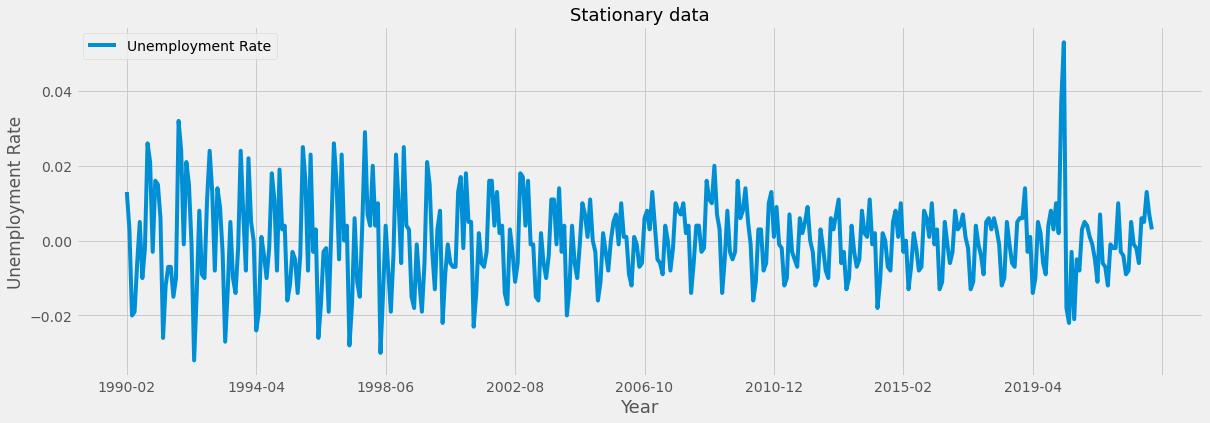

In [8]:
diff(Fresno)